# Notebook for plotting results from files after repeating runs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.environ["GEO_BENCH_DIR"] = "/Users/cpi/terratorch"
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns

import geobench as gb

# from geobench_exp.experiment import parse_results
from matplotlib.ticker import FormatStrFormatter
import json
from scipy.stats import trim_mean
import plot_tools

In [3]:
name_mapping = {
    "big_earth_net": "m-bigearthnet",
    "brick_kiln": "m-brick-kiln",
    "eurosat": "m-eurosat",
    "forestnet": "m-forestnet",
    "pv4ger": "m-pv4ger",
    "so2sat": "m-so2sat",
    "neontree": "m-NeonTree",
    "sa_crop_type": "m-SA-crop-type",
    "cashew": "m-cashew-plant",
    "chesapeake": "m-chesapeake",
    "nz_cattle": "m-nz-cattle",
    "pv4ger_seg": "m-pv4ger-seg",
}

In [4]:
prithvi_results = pd.read_csv("prithvi_swin_B_test.csv", index_col="Unnamed: 0")
prithvi_results["Backbone"] = "prithvi-eo-hls-90m-swin-B"

prithvi_results_2 = pd.read_csv("prithvi_swin_B_16.csv", index_col="Unnamed: 0")
prithvi_results_2["Backbone"] = "prithvi-eo-hls-90m-swin-B-2"

# resnet_18_results = pd.read_csv("resnet18_timm.csv", index_col="Unnamed: 0")
# resnet_18_results["Task"] = resnet_18_results["Task"].map(name_mapping)
# resnet_18_results["Backbone"] = "resnet18-timm-ours"

prithvi_global_results = pd.read_csv("prithvi_vit_global.csv", index_col="Unnamed: 0")
prithvi_global_results["Backbone"] = "prithvi-eo-hls-100m-vit"

prithvi_os_results = pd.read_csv("prithvi_vit_os.csv", index_col="Unnamed: 0")
prithvi_os_results["Backbone"] = "prithvi-eo-hls-100m-vit-os"

prithvi_results = pd.concat(
    [prithvi_results, prithvi_os_results, prithvi_global_results], ignore_index=True
)

In [5]:
prithvi_results = prithvi_results.rename(
    columns={"Task": "dataset", "Backbone": "model", "Score": "test metric"}
)
prithvi_results["partition name"] = "1.00x train"
prithvi_results["dataset"] = prithvi_results["dataset"].map(name_mapping)

In [6]:
prithvi_results_2 = prithvi_results_2.rename(
    columns={"Task": "dataset", "Backbone": "model", "Score": "test metric"}
)
prithvi_results_2["partition name"] = "1.00x train"
prithvi_results_2["dataset"] = prithvi_results_2["dataset"].map(name_mapping)

In [7]:
geobench_results_class = pd.read_csv("baseline_classification_results.csv")
df_1x = plot_tools.extract_1x_data(geobench_results_class)
model_order = "prithvi-eo-hls-90m-swin-B,prithvi-eo-hls-100m-vit,prithvi-eo-hls-100m-vit-os,ResNet18-Rnd,ResNet18-timm,ResNet18-MoCo-S2,ResNet50-SECO-S2,ResNet50-MoCo-S2,ResNet50-timm,ConvNeXt-B-timm,ViT-T-timm,ViT-S-timm,SwinV2-T-timm".split(
    ","
)
model_colors = dict(
    zip(model_order, sns.color_palette("tab20", n_colors=len(model_order)))
)

In [8]:
model_colors

{'prithvi-eo-hls-90m-swin-B': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765),
 'prithvi-eo-hls-100m-vit': (0.6823529411764706,
  0.7803921568627451,
  0.9098039215686274),
 'prithvi-eo-hls-100m-vit-os': (1.0, 0.4980392156862745, 0.054901960784313725),
 'ResNet18-Rnd': (1.0, 0.7333333333333333, 0.47058823529411764),
 'ResNet18-timm': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'ResNet18-MoCo-S2': (0.596078431372549,
  0.8745098039215686,
  0.5411764705882353),
 'ResNet50-SECO-S2': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'ResNet50-MoCo-S2': (1.0, 0.596078431372549, 0.5882352941176471),
 'ResNet50-timm': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'ConvNeXt-B-timm': (0.7725490196078432,
  0.6901960784313725,
  0.8352941176470589),
 'ViT-T-timm': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'ViT-S-timm': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'SwinV2-T-timm':

In [9]:
classification_datasets = [
    "m-bigearthnet",
    "m-brick-kiln",
    "m-eurosat",
    "m-forestnet",
    "m-pv4ger",
    "m-so2sat",
]
# exclude bigearthnet for now
# classification_datasets = ["m-brick-kiln", "m-eurosat", "m-forestnet", "m-pv4ger", "m-so2sat"]
segmentation_datasets = list(
    set(prithvi_results["dataset"].unique().tolist()) - set(classification_datasets)
)
# segmentation_datasets.remove("m-bigearthnet")
# segmentation_datasets.remove("m-cashew-plant")

In [10]:
prithvi_class = prithvi_results[
    prithvi_results["dataset"].isin(classification_datasets)
]
prithvi_seg = prithvi_results[prithvi_results["dataset"].isin(segmentation_datasets)]

prithvi_class_2 = prithvi_results_2[
    prithvi_results_2["dataset"].isin(classification_datasets)
]
prithvi_seg_2 = prithvi_results_2[
    prithvi_results_2["dataset"].isin(segmentation_datasets)
]

In [11]:
dataset_res = {
    "m-bigearthnet": "10m",
    "m-so2sat": "10m",
    "m-brick-kiln": "10m",
    "m-forestnet": "15m",
    "m-eurosat": "10m",
    "m-pv4ger": "0.1m",
    "m-pv4ger-seg": "0.1m",
    "m-chesapeake": "1m",
    "m-cashew-plant": "10m",
    "m-SA-crop-type": "10m",
    "m-nz-cattle": "0.1m",
    "m-NeonTree": "0.1m",
}

dataset_instrument = {
    "m-bigearthnet": "S2",
    "m-so2sat": "S2 + S1",
    "m-brick-kiln": "S2",
    "m-forestnet": "Landsat",
    "m-eurosat": "S2",
    "m-pv4ger": "RGB",
    "m-pv4ger-seg": "RGB",
    "m-chesapeake": "RGBN",
    "m-cashew-plant": "S2",
    "m-SA-crop-type": "S2",
    "m-nz-cattle": "RGB",
    "m-NeonTree": "RGB + Hyper",
}

img_size = {
    "m-bigearthnet": 120,
    "m-so2sat": 32,
    "m-brick-kiln": 64,
    "m-forestnet": 332,
    "m-eurosat": 64,
    "m-pv4ger": 320,
    "m-pv4ger-seg": 320,
    "m-chesapeake": 256,
    "m-cashew-plant": 256,
    "m-SA-crop-type": 256,
    "m-nz-cattle": 500,
    "m-NeonTree": 400,
}

dataset_name_map = {
    name: f"{name}\n {dataset_instrument[name]} @ {dataset_res[name]}"
    for name in img_size.keys()
}

In [12]:
class_df = pd.concat(
    [
        df_1x[["model", "dataset", "test metric", "partition name"]],
        prithvi_class.drop(columns=["Metric"]),
    ],
    ignore_index=True,
)
# class_df = pd.concat([class_df[["model", "dataset", "test metric", "partition name"]], prithvi_class_2.drop(columns=["Metric"])], ignore_index=True)
# class_df["dataset"] = class_df["dataset"].map(lambda x: f'{x} ({dataset_instrument[x]} [{dataset_res[x]}])\n{img_size[x]} x {img_size[x]}').astype(str)

In [13]:
class_df.groupby(["model", "dataset"]).agg(["mean", "std"]).to_csv(
    "table_classification.csv"
)

/var/folders/fs/t946l60s4ys3hk9xq7sbp3pc0000gn/T/ipykernel_74014/162386607.py:1: FutureWarning: ['partition name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  class_df.groupby(["model", "dataset"]).agg(["mean", "std"]).to_csv("table_classification.csv")


/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorc

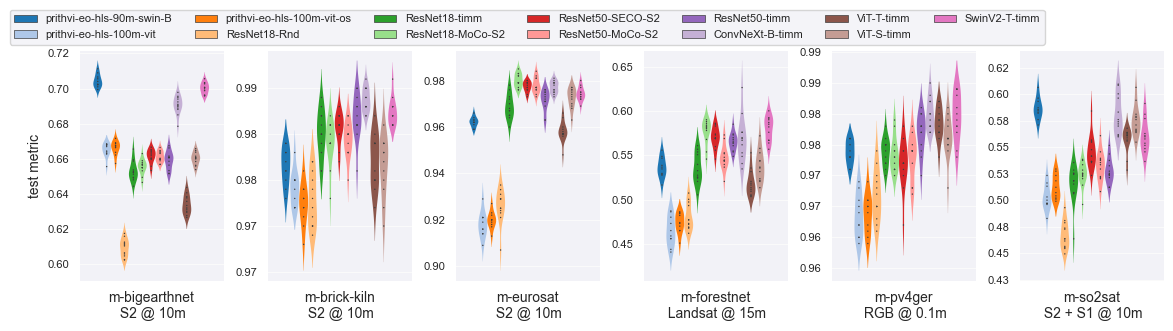

In [14]:
class_df["dataset"] = class_df["dataset"].map(dataset_name_map)
plot_tools.plot_per_dataset(
    class_df,
    model_order,
    model_colors=model_colors,
    metric="test metric",
    sharey=False,
    inner="points",
    fig_size=(14, 3),
    n_legend_rows=2,
)
plt.savefig("classification_raw.png", bbox_inches="tight")

/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorc

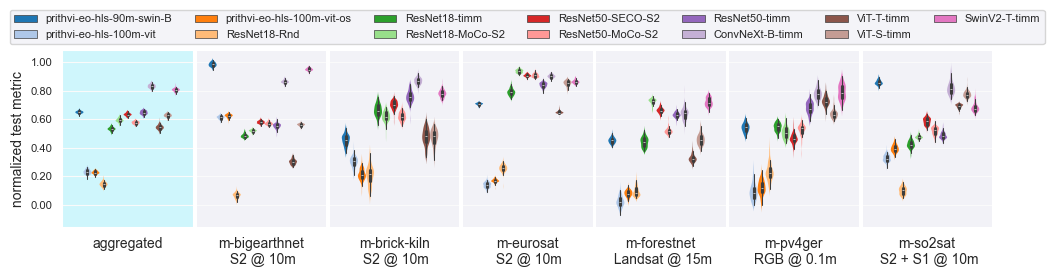

In [15]:
agg_class = plot_tools.normalize_bootstrap_and_plot(
    class_df,
    metric="test metric",
    benchmark_name="classification_v1.0",
    model_order=model_order,
    model_colors=model_colors,
    fig_size=(12, 2.3),
    dataset_name_map=dataset_name_map,
)
plt.savefig("classification_normalized.png", bbox_inches="tight")

In [16]:
agg_class.groupby(["model", "dataset"]).agg(["mean", "std"]).to_csv(
    "class_with_aggregated.csv"
)

/var/folders/fs/t946l60s4ys3hk9xq7sbp3pc0000gn/T/ipykernel_74014/1646273235.py:1: FutureWarning: ['partition name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_class.groupby(["model", "dataset"]).agg(["mean", "std"]).to_csv("class_with_aggregated.csv")


## Segmentation

In [17]:
model_order = "prithvi-eo-hls-90m-swin-B,prithvi-eo-hls-100m-vit,prithvi-eo-hls-100m-vit-os,ResNet18-U-Net-timm,ResNet50-U-Net-timm,ResNet101-U-Net-timm,ResNet18 DeepLabV3-timm,ResNet50 DeepLabV3-timm,ResNet101 DeepLabV3-timm".split(
    ","
)
model_colors = dict(
    zip(model_order, sns.color_palette("tab20", n_colors=len(model_order)))
)

In [18]:
geobench_results_seg = pd.read_csv("baseline_segmentation_results.csv")
df_1x = plot_tools.extract_1x_data(geobench_results_seg)

In [19]:
seg_df = pd.concat(
    [
        df_1x[["model", "dataset", "test metric", "partition name"]],
        prithvi_seg.drop(columns=["Metric"]),
    ],
    ignore_index=True,
)

In [20]:
seg_df.groupby(["model", "dataset"]).agg(["mean", "std"])

/var/folders/fs/t946l60s4ys3hk9xq7sbp3pc0000gn/T/ipykernel_74014/907312403.py:1: FutureWarning: ['partition name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  seg_df.groupby(["model", "dataset"]).agg(["mean", "std"])


test metric          
                                                 mean       std
model                      dataset                             
ResNet101 DeepLabV3-timm   m-NeonTree        0.538612  0.064689
                           m-SA-crop-type    0.304117  0.004520
                           m-cashew-plant    0.485502  0.004331
                           m-chesapeake      0.620987  0.034441
                           m-nz-cattle       0.676192  0.002751
                           m-pv4ger-seg      0.933708  0.000347
ResNet101-U-Net-timm       m-NeonTree        0.565948  0.003492
                           m-SA-crop-type    0.299119  0.005340
                           m-cashew-plant    0.464952  0.009940
                           m-chesapeake      0.707875  0.006886
                           m-nz-cattle       0.805297  0.001976
                           m-pv4ger-seg      0.940759  0.001390
ResNet18 DeepLabV3-timm    m-NeonTree        0.461094  0.008054
                           m-SA-crop-type    0.270140  0.003954
                           m-cashew-plant    0.386348  0.008706
                           m-chesapeake      0.565168  0.004506
                           m-nz-cattle       0.659834  0.002829
                           m-pv4ger-seg      0.931696  0.000743
ResNet18-U-Net-timm        m-NeonTree        0.564620  0.003249
                           m-SA-crop-type    0.275322  0.004177
                           m-cashew-plant    0.409121  0.008095
                           m-chesapeake      0.686585  0.006825
                           m-nz-cattle       0.810122  0.002654
                           m-pv4ger-seg      0.940813  0.001000
ResNet50 DeepLabV3-timm    m-NeonTree        0.582180  0.002666
                           m-SA-crop-type    0.298868  0.004020
                           m-cashew-plant    0.446579  0.005750
                           m-chesapeake      0.633784  0.025247
                           m-nz-cattle       0.671736  0.003469
                           m-pv4ger-seg      0.936827  0.000899
ResNet50-U-Net-timm        m-NeonTree        0.564574  0.003054
                           m-SA-crop-type    0.294530  0.004782
                           m-cashew-plant    0.487289  0.005860
                           m-chesapeake      0.711155  0.003412
                           m-nz-cattle       0.810733  0.002085
                           m-pv4ger-seg      0.940252  0.000829
prithvi-eo-hls-100m-vit    m-NeonTree        0.526080  0.007041
                           m-SA-crop-type    0.314257  0.002946
                           m-cashew-plant    0.752109  0.013272
                           m-chesapeake      0.630069  0.013468
                           m-nz-cattle       0.567699  0.127969
                           m-pv4ger-seg      0.923238  0.003280
prithvi-eo-hls-100m-vit-os m-NeonTree        0.524225  0.027558
                           m-SA-crop-type    0.296083  0.086336
                           m-cashew-plant    0.761445  0.034216
                           m-chesapeake      0.623448  0.014278
                           m-nz-cattle       0.566812  0.126539
                           m-pv4ger-seg      0.917663  0.003791
prithvi-eo-hls-90m-swin-B  m-NeonTree        0.547004  0.004482
                           m-SA-crop-type    0.363195  0.002046
                           m-cashew-plant    0.708228  0.046012
                           m-chesapeake      0.631455  0.019423
                           m-nz-cattle       0.815646  0.004968
                           m-pv4ger-seg      0.945221  0.001707

/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorc

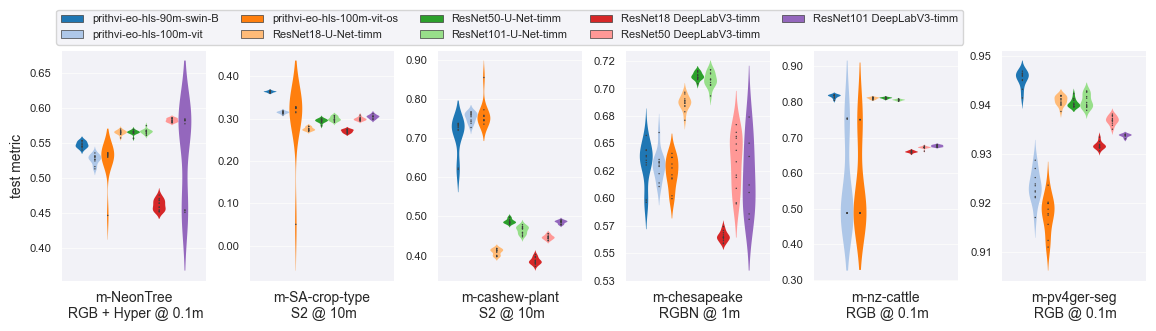

In [21]:
seg_df["dataset"] = seg_df["dataset"].map(dataset_name_map)
plot_tools.plot_per_dataset(
    seg_df,
    model_order,
    model_colors=model_colors,
    metric="test metric",
    sharey=False,
    inner="points",
    fig_size=(14, 3),
    n_legend_rows=2,
)
plt.savefig("segmentation_raw.png", bbox_inches="tight")

/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorc

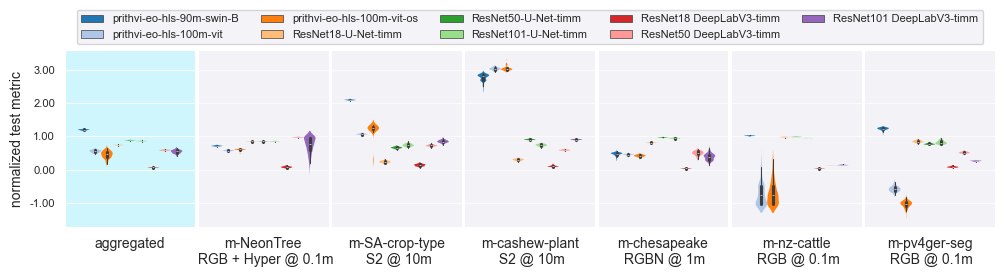

In [22]:
agg_seg = plot_tools.normalize_bootstrap_and_plot(
    seg_df,
    metric="test metric",
    benchmark_name="segmentation_v1.0",
    model_order=model_order,
    model_colors=model_colors,
    fig_size=(12, 2.3),
    dataset_name_map=dataset_name_map,
)

plt.savefig("segmentation_normalized.png", bbox_inches="tight")

/Users/cpi/terratorch/plot_tools.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_metric] = df.apply(lambda row: self.__call__(row["dataset"], row[metric], dataset_name_map=reverse_map), axis=1)
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/Users/cpi/terratorch/plot_tools.py:219: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` 

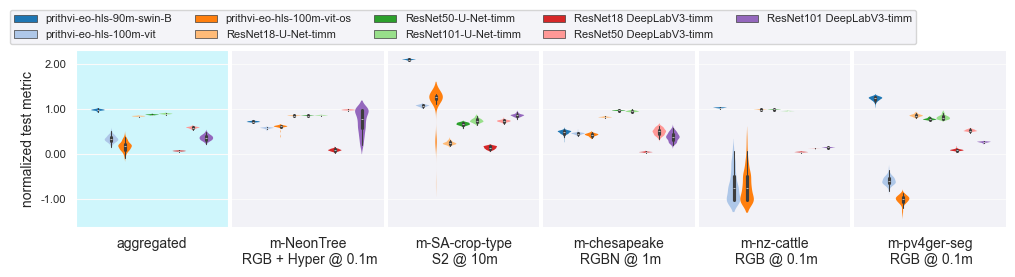

In [23]:
agg_seg = plot_tools.normalize_bootstrap_and_plot(
    seg_df[seg_df["dataset"] != dataset_name_map["m-cashew-plant"]],
    metric="test metric",
    benchmark_name="segmentation_v1.0",
    model_order=model_order,
    model_colors=model_colors,
    fig_size=(12, 2.3),
    dataset_name_map=dataset_name_map,
)
plt.savefig("segmentation_normalized_no_cashew.png", bbox_inches="tight")

In [24]:
agg_seg.groupby(["model", "dataset"]).agg(["mean", "std"]).to_csv(
    "seg_with_aggregated.csv"
)

/var/folders/fs/t946l60s4ys3hk9xq7sbp3pc0000gn/T/ipykernel_74014/3873402480.py:1: FutureWarning: ['partition name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_seg.groupby(["model", "dataset"]).agg(["mean", "std"]).to_csv("seg_with_aggregated.csv")


In [25]:
pd.read_csv("seg_with_aggregated.csv")

,Unnamed: 0,Unnamed: 1,normalized test metric,normalized test metric.1
0,NaN,NaN,mean,std
1,model,dataset,NaN,NaN
2,ResNet101 DeepLabV3-timm,aggregated,0.3528350846365344,0.057965977903262945
3,ResNet101 DeepLabV3-timm,m-NeonTree\n RGB + Hyper @ 0.1m,0.7146034314606985,0.25685376362734375
4,ResNet101 DeepLabV3-timm,m-SA-crop-type\n S2 @ 10m,0.8498533024800031,0.03205803332320176
5,ResNet101 DeepLabV3-timm,m-chesapeake\n RGBN @ 1m,0.3710000994760926,0.0924614932996833
6,ResNet101 DeepLabV3-timm,m-nz-cattle\n RGB @ 0.1m,0.13712914525881784,0.006814671839425135
7,ResNet101 DeepLabV3-timm,m-pv4ger-seg\n RGB @ 0.1m,0.2564288891495823,0.012994888011184444
8,ResNet101-U-Net-timm,aggregated,0.8863822627505669,0.009634382297622514
9,ResNet101-U-Net-timm,m-NeonTree\n RGB + Hyper @ 0.1m,0.8532903676238023,0.004937111591430429


In [26]:
seg_df.to_csv("raw_segmentation_data.csv")

In [27]:
agg_seg.to_csv("normalized_segmentation.csv")

In [28]:
agg_class.to_csv("normalized_classification.csv")

In [29]:
class_df.to_csv("raw_classification_data.csv")